In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

In [13]:
# Connexion à MongoDB et chargement des données
client = MongoClient("localhost", 27017)
db = client.IF29
collec = db.user_db_norm
data_db = pd.DataFrame(list(collec.find()))
data = data_db.sample(frac=0.02)

In [14]:
features = [
    'verified', 'protected', 'friend_nb',
        'listed_nb', 'follower_nb', 'favorites_nb', 'len_description',
        'hash_avg', 'mention_avg', 'url_avg', 'symbols_avg', 'tweet_nb',
        'tweet_user_count', 'user_lifetime', 'tweet_frequency',
        'friend_frequency', 'aggressivity', 'visibility', 'ff_ratio'
]
X = data[features]

In [15]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X)

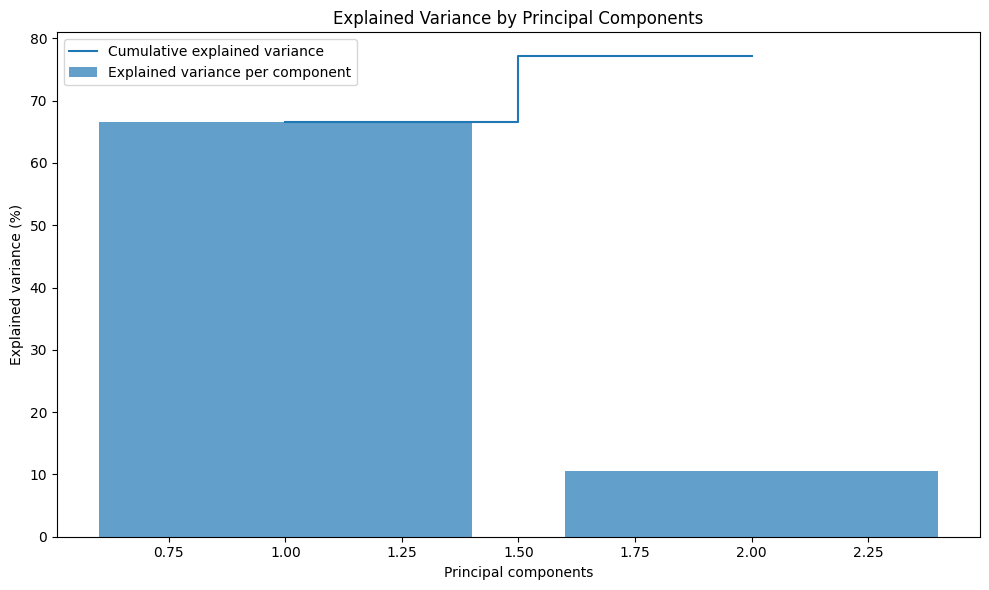

In [16]:

# Calculer les pourcentages d'information expliquée
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cumulative = np.cumsum(explained_variance_ratio)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7, align='center',
        label='Explained variance per component')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio_cumulative * 100, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance (%)')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
cah = linkage(pca_res, method="ward")

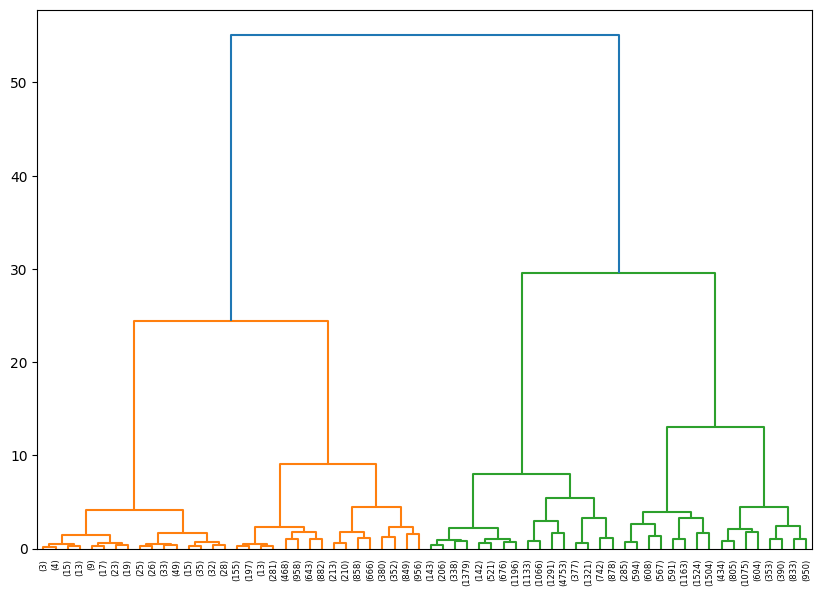

In [18]:
plt.figure(figsize=(10, 7))
dendrogram(cah, truncate_mode="level", p=5)
plt.show()

In [35]:
max_d = 30.0 # ajuster
clusters = fcluster(cah, max_d, criterion="distance")

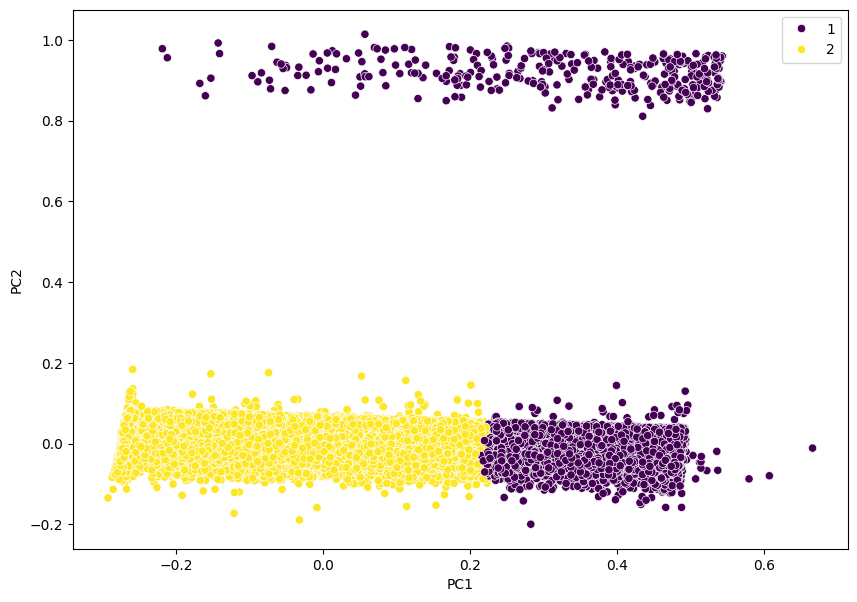

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_res[:, 0], y=pca_res[:, 1], hue=clusters, palette="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()